In [1]:
import calour as ca
import calour_utils as cu

failed to load logging config file


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
pwd

'/Users/amnon/git/dbbact-paper/notebooks/horse-feces-22-04-30'

In [4]:
ca.set_log_level(11)

In [5]:
%matplotlib inline

In [6]:
db=ca.database._get_database_class('dbbact')

creating logger


# Load the data
### from
Arnold, Carolyn E., Rachel Pilla, M. Keith Chaffin, Jessica L. Leatherwood, Tryon A. Wickersham, Todd R. Callaway, Sara D. Lawhon, Jonathan A. Lidbury, Joerg M. Steiner, and Jan S. Suchodolski. 

"The effects of signalment, diet, geographic location, season, and colitis associated with antimicrobial use or Salmonella infection on the fecal microbiome of horses." 

Journal of Veterinary Internal Medicine 35, no. 5 (2021): 2437-2448.

https://doi.org/10.1111/jvim.16206

In [7]:
dat=ca.read_amplicon('./all.biom','./map.txt',normalize=10000,min_reads=1000)

2022-06-19 14:41:27 INFO loaded 106 samples, 10528 features
2022-06-19 14:41:27 WARNING Do you forget to normalize your data? It is required before running this function
2022-06-19 14:41:27 INFO After filtering, 106 remain.


In [8]:
datc=dat.cluster_features(10)

2022-06-19 14:41:27 INFO After filtering, 5315 remain.


In [9]:
datc.sample_metadata.type.value_counts()

Normals    80
Colitis    26
Name: type, dtype: int64

In [10]:
datc=datc.sort_samples('type2')
datc=datc.sort_samples('geo_loc_name')

In [11]:
dd=datc.diff_abundance('type','Normals','Colitis',random_seed=2022)

2022-06-19 14:41:29 INFO 106 samples with both values
2022-06-19 14:41:29 INFO After filtering, 5315 remain.
2022-06-19 14:41:29 INFO 80 samples with value 1 (['Normals'])
2022-06-19 14:41:33 INFO number of higher in Normals: 2441. number of higher in Colitis : 399. total 2840


2022-06-19 14:41:33 INFO Getting dbBact annotations for 2840 sequences, please wait...
2022-06-19 14:41:33 INFO Limited to maximal annotationid: 7440
2022-06-19 14:42:10 INFO got 4328 annotations
2022-06-19 14:42:11 WARNING ignoring 1 annotation with id > max_id 7440
2022-06-19 14:42:11 INFO Got 48162 annotation-sequence pairs
2022-06-19 14:42:11 INFO Added annotation data to experiment. Total 4327 annotations, 2840 ASVs
2022-06-19 14:42:11 INFO Found 1 experiments ([902]) matching current experiment - ignoring them.
2022-06-19 14:42:28 INFO found 7 negative
2022-06-19 14:42:29 INFO found 7 positive


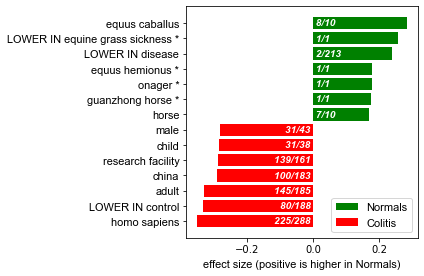

In [12]:
f,e=dd.plot_diff_abundance_enrichment(ignore_exp=True,labels_kwargs={'family':'Arial','size':11},numbers_kwargs={'family':'arial','size':10,'weight':'bold','color':'white','style':'italic'}, max_id=7440,min_appearances=1,num_results_needed=7,max_show=7)
ax=plt.gca()
ax.set_aspect(1.0/ax.get_data_ratio()*1)
ax.figure.tight_layout()


In [13]:
f.figure.savefig('./fig-terms.pdf')

2022-06-19 14:45:24 INFO found 280 annotations with the term ['child']
2022-06-19 14:45:27 INFO annotation 6162 is low
2022-06-19 14:45:28 INFO annotation 28 is low
2022-06-19 14:45:36 INFO annotation 7280 is low
2022-06-19 14:45:37 INFO annotation 7283 is low
2022-06-19 14:45:39 INFO annotation 4233 is low
2022-06-19 14:45:50 INFO annotation 6385 is low
2022-06-19 14:45:55 INFO annotation 3335 is low
2022-06-19 14:46:05 INFO annotation 5627 is low
2022-06-19 14:46:11 INFO annotation 559 is low
2022-06-19 14:46:21 INFO annotation 4697 is low
2022-06-19 14:46:24 INFO annotation 5764 is low
2022-06-19 14:46:37 INFO annotation 5860 is low
2022-06-19 14:46:37 INFO annotation 2793 is low
2022-06-19 14:46:50 INFO ignored 0 annotations
{'100': 297, '010': 2399, '001': 5893, '110': 0, '101': 102, '011': 42, '111': 0}


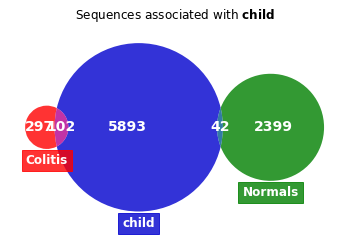

In [15]:
f=db.plot_term_venn_all('child',dd,colors_alpha=0.8,label_kwargs={'color':'w','fontweight':'bold','fontsize':14},max_id=7440,)

In [16]:
f.savefig('./fig-venn-child.pdf')

# Also look at the wordcloud of each group

2022-06-19 14:27:20 INFO After filtering, 798 remain.
2022-06-19 14:27:20 INFO Getting dbBact annotations for 798 sequences, please wait...
2022-06-19 14:27:31 INFO got 2999 annotations
2022-06-19 14:27:31 INFO Got 16746 annotation-sequence pairs
2022-06-19 14:27:31 INFO Added annotation data to experiment. Total 2999 annotations, 798 ASVs
2022-06-19 14:27:31 INFO Found 1 experiments ([902]) matching current experiment - ignoring them.


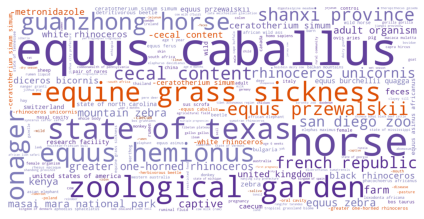

In [21]:
normal=datc.filter_samples('type','Normals')
f=db.draw_wordcloud(normal.filter_prevalence(0.3),ignore_exp=True)

2022-05-02 13:01:54 INFO After filtering, 216 remain.
2022-05-02 13:01:54 INFO Getting dbBact annotations for 216 sequences, please wait...
2022-05-02 13:01:58 INFO got 2669 annotations
2022-05-02 13:01:58 INFO Got 11755 annotation-sequence pairs
2022-05-02 13:01:58 INFO Added annotation data to experiment. Total 2669 annotations, 216 ASVs
2022-05-02 13:01:58 INFO Found 1 experiments ([902]) matching current experiment - ignoring them.


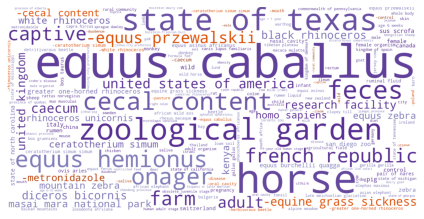

In [16]:
colitis=datc.filter_samples('type','Colitis')
f=db.draw_wordcloud(colitis.filter_prevalence(0.3),ignore_exp=True)

# dbBact term related PCA

2022-05-02 13:02:41 INFO Getting dbBact annotations for 5315 sequences, please wait...
2022-05-02 13:03:09 INFO got 4609 annotations
2022-05-02 13:03:09 INFO Got 69408 annotation-sequence pairs
2022-05-02 13:03:09 INFO Added annotation data to experiment. Total 4609 annotations, 5315 ASVs
2022-05-02 13:03:09 INFO Found 1 experiments ([902]) matching current experiment - ignoring them.
2022-05-02 13:03:10 WARNING Do you forget to normalize your data? It is required before running this function
2022-05-02 13:03:10 INFO After filtering, 3970 remain.


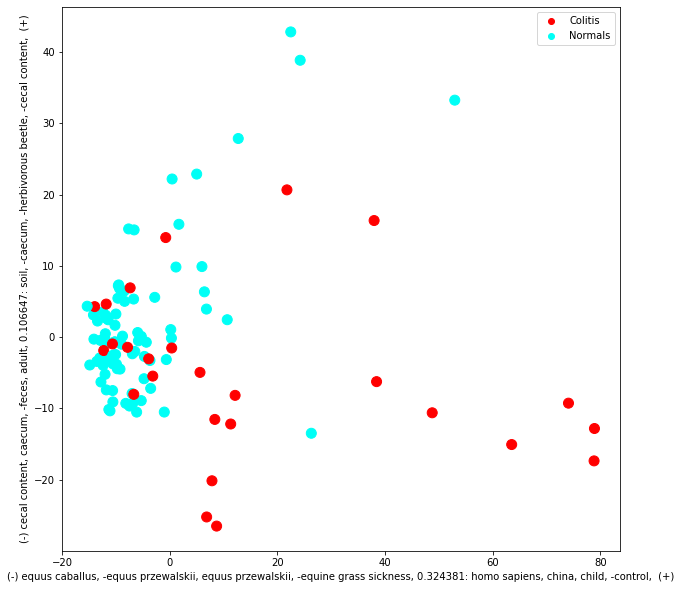

In [17]:
f=cu.plot_term_pcoa(datc,'type',ignore_exp=True)